In [114]:
import pandas as pd
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier

In [115]:
df  = pd.read_csv('heart1.csv')

In [116]:
df

,Individual_age,Gender,Chest_Pain,Resting_Blood Pressure,Cholestrol,Fasting_Blood Sugar,Rest_Echocardiogram,Maximum_Heart_Rate,Exercise_Induced Angina,ST_Depression,ST_Slope,Major_Vessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [117]:
import pandas as pd
df= pd.read_csv('heart1.csv')

Text(0, 0.5, 'Number of patients')

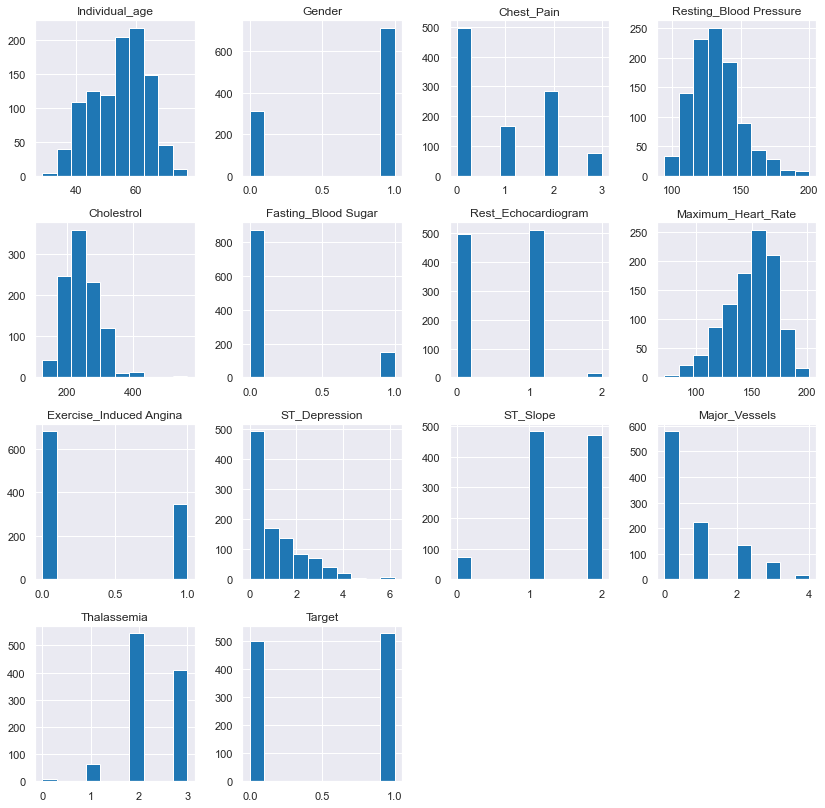

In [118]:
import matplotlib.pyplot as plt
df.hist(figsize=(14,14))
plt.ylabel('Number of patients')



In [119]:
df.shape

(1025, 14)

In [120]:
X = df.iloc[:,:-1].values

In [121]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [122]:
y=df.iloc[:,-1].values

In [123]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [124]:
y = y.flatten()
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [125]:
#y = y.flatten()
print(y)

[0 0 0 ... 0 1 0]


In [126]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [127]:
    knn = KNeighborsClassifier(n_neighbors = 20)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.7121951219512195


In [128]:
pickle.dump(knn,open('heart_knn_model.sav','wb'))

In [129]:
predict = knn.predict(X_test)
knn_accuracy  = metrics.accuracy_score(y_test,predict)

In [130]:
predict

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [131]:
knn_accuracy

0.7121951219512195

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

In [134]:
prediction = clf.predict(X_test)
dcTree_accuracy2 = metrics.accuracy_score(y_test,prediction)

In [135]:
print(prediction)
print(dcTree_accuracy2)

[1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0]
1.0


In [136]:
pickle.dump(clf,open('heart_dt_model.sav','wb'))

In [137]:
clf = pickle.load(open('heart_dt_model.sav','rb'))

In [138]:
pre = clf.predict(X_test)
pre
rf_acc = metrics.accuracy_score(y_test,pre)
rf_acc

1.0

In [139]:
input = [[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]
p = clf.predict(input)

In [140]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [141]:
p = rf.predict(X_test)

rf_acc = metrics.accuracy_score(y_test,p)

p

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [142]:
pickle.dump(clf,open('heart_rt_model.pkl','wb'))
clf = pickle.load(open('heart_rt_model.pkl','rb'))


In [143]:
import joblib

In [144]:
joblib.dump(rf,'heart_rt_model1.sav')

['heart_rt_model1.sav']

In [145]:
model = joblib.load('heart_rt_model1.sav')

In [146]:
model.predict_proba(X_test)

array([[0.04, 0.96],
       [0.01, 0.99],
       [0.26, 0.74],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.11, 0.89],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.11, 0.89],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.78, 0.22],
       [0.09, 0.91],
       [0.04, 0.96],
       [0.06, 0.94],
       [1.  , 0.  ],
       [0.08, 0.92],
       [0.85, 0.15],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.92, 0.08],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.98, 0.02],
       [0.05, 0.95],
       [0.02, 0.98],
       [0.09, 0.91],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.  ,

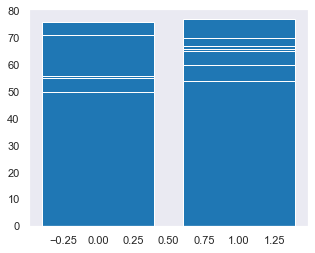

In [170]:
plt.figure(figsize=(5,4))
plt.grid(False)
plt.bar(x=df['Gender'],height=df["Individual_age"])
plt.show()

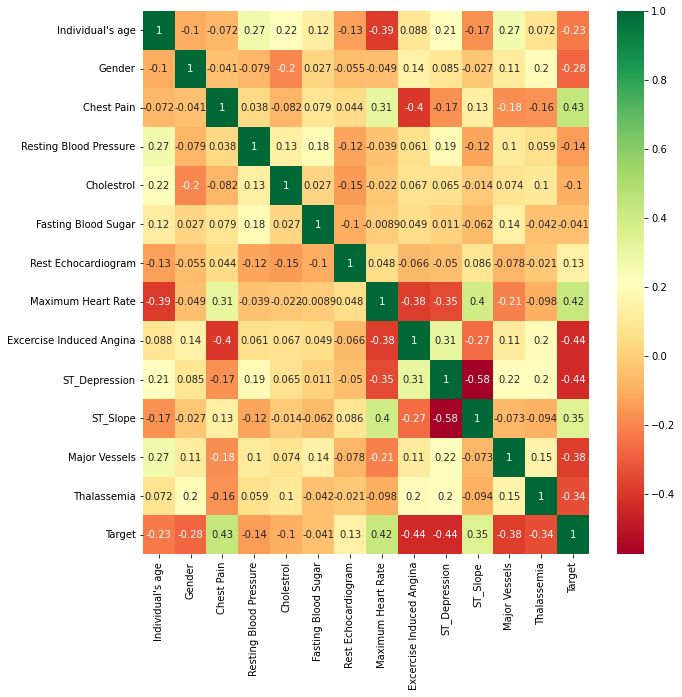

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<BarContainer object of 3 artists>

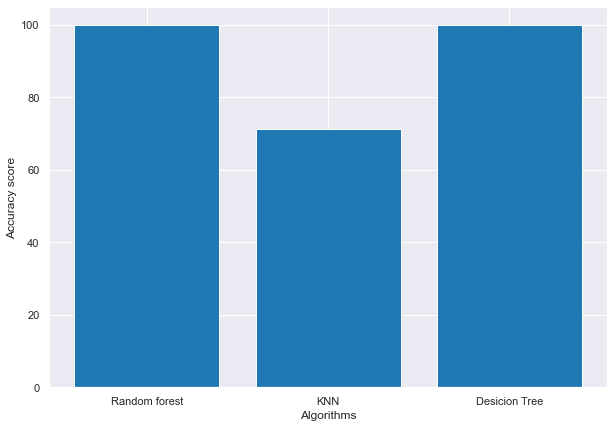

In [176]:
#with sns.color_palette('muted'):
algo_name = ['Random forest','KNN','Desicion Tree']
scoress = [float(rf_acc)*100,float(knn_accuracy)*100,float(dcTree_accuracy2)*100]

 # sns.set(rc={'figure.figsize':(10,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.bar(algo_name,scoress)


  # sns.barplot(algo_name,scoress)

C:\Users\vimar\AppData\Local\Temp\ipykernel_13268\3763519285.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0].Individual_age)
C:\Users\vimar\AppData\Local\Temp\ipykernel_13268\3763519285.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==1].Individual_age

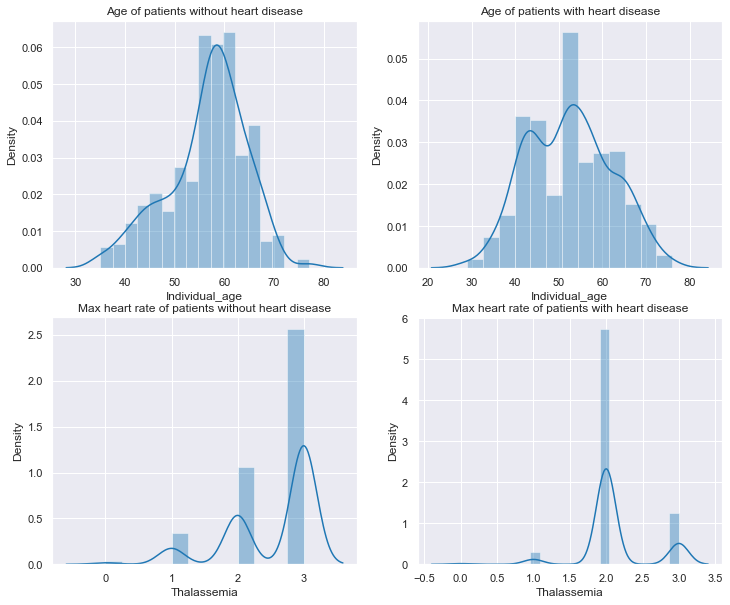

In [162]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['Target']==0].Individual_age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['Target']==1].Individual_age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['Target']==0].Thalassemia )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['Target']==1].Thalassemia )
plt.title('Max heart rate of patients with heart disease')
plt.show()